# Setup DB connection

In [27]:
import os
import math
import string
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()
DB_HOST = {'course': os.environ['COURSE_DB_HOST'], 'app': os.environ['APP_DB_HOST']}
DB_PORT = {'course': os.environ['COURSE_DB_PORT'], 'app': os.environ['APP_DB_PORT']}
DB_NAME = {'course': os.environ['COURSE_DB_NAME'], 'app': os.environ['APP_DB_NAME']}
DB_USER = {'course': os.environ['COURSE_DB_USER'], 'app': os.environ['APP_DB_USER']}
DB_PASS = {'course': os.environ['COURSE_DB_PASSWORD'], 'app': os.environ['APP_DB_PASSWORD']}

In [28]:
import psycopg2

course_connection = psycopg2.connect(host=DB_HOST['course'], port=int(DB_PORT['course']), dbname=DB_NAME['course'], user=DB_USER['course'], password=DB_PASS['course'])
app_connection = psycopg2.connect(host=DB_HOST['app'], port=int(DB_PORT['app']), dbname=DB_NAME['app'], user=DB_USER['app'], password=DB_PASS['app'])
course_cursor = course_connection.cursor()
app_cursor = app_connection.cursor()

# Data analysis

## Courses

0 365
1 Principles of Evolutionary Medicine
2 BIOL
3 48
4 None
5 http://dartmouth.smartcatalogiq.com/en/2015/orc/Departments-Programs-Undergraduate/Biological-Sciences/BIOL-Biological-Sciences-Undergraduate/BIOL-48
6 ORC
7 2016-02-09 08:14:43.727876+00:00
8 2016-02-09 08:17:32.202661+00:00
9 0
10 0
11 This course considers human health and disease from the perspective of evolutionary biology.  Topics will include adaptive explanations for the life history traits, the evolution of nutrition metabolism, host-pathogen co-evolution, models of disease dynamics and the ecology of disease, the evolution of sexual reproduction and sexual dimorphism, and the evolution of altruism.


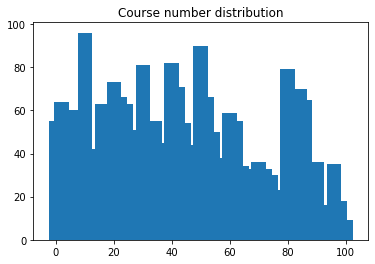

In [24]:
course_cursor.execute('SELECT * FROM web_course;')
courses = course_cursor.fetchall()

print('Table columns:')
for idx, item in enumerate(courses[385]):
    print('\t', idx, item)

buckets = dict()
factor = 2
for i in [factor * i for i in range(math.ceil(100 / factor) + 1)]:
    buckets[i] = 0
for course in courses:
    number = course[3]
    if number <= 100:
        buckets[(number // factor) * factor] += 1

plt.title('Course number distribution')
plt.bar(buckets.keys(), buckets.values(), width=5)
plt.show()

## Professors

Table columns:
	 0 51
	 1 Mayumi Ishida
	 2 2016-02-09 16:32:49.894667+00:00
	 3 2016-02-09 16:32:49.894707+00:00


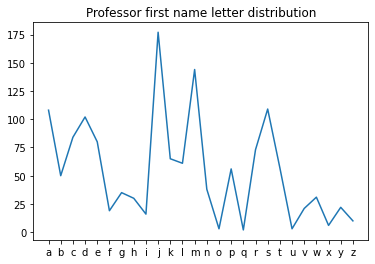

In [26]:
app_cursor.execute('SELECT * FROM web_instructor;')
instructors = app_cursor.fetchall()

print('Table columns:')
for idx, item in enumerate(instructors[50]):
    print('\t', idx, item)

alphabet = dict()
for letter in list(string.ascii_lowercase):
    alphabet[letter] = 0

for instructor in instructors:
    alphabet[instructor[1].strip()[0].lower()] += 1


plt.title('Professor first name letter distribution')
plt.plot(alphabet.keys(), alphabet.values())
plt.show()